<a href="https://colab.research.google.com/github/sallez9/SCTPAIMLcapstone/blob/main/zu_CVproduceqlty_260824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computer Vision for Produce Quality in Fruit**

**Reference:**
* **TensorFlow/Keras documentation:** [https://www.tensorflow.org/](https://www.tensorflow.org/)
* **Deep Learning book (Ian Goodfellow, Yoshua Bengio, and Aaron Courville):** [http://www.deeplearningbook.org/](http://www.deeplearningbook.org/)
* **Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow (Aurélien Géron)**
* **Multilabel Fruits Classification | CNN | Keras' kaggle.com Devashree Madhugiri** https://www.kaggle.com/code/devsubhash/multilabel-fruits-classification-cnn-keras

* **SVMClassification_OnAppledatasetOpenCV** https://github.com/sarathbabu123/SVMClassification_OnAppledatasetOpenCV

This project proposes a method involving the deep learning technique which is CNN for feature extraction and classification of defect fruits. It is one of the applications of image classification problems. This approach uses an RGB channel image of the fruit under examination.

Use Case: Detecting Defect Fruits

With Deep Learning's capabilities, fruit classification can be well implemented as a replacement of traditional manual methods in the agricultural, horticultural and botany domains. By utilizing these models,we can introduce efficiency and accuracy into various fruit-related processes.

Fruit classification can assist in inventory management for grocery stores and warehouses. With the ability to automatically classify and count different fruits in stock, businesses can optimize their supply chain and ensure adequate stock levels.

Deep Learning can aid in identifying spoiled fruits, such as detecting fungus presence on their skin. By automating this process, we can minimize waste and enhance the quality control in fruit distribution centers.

By analyzing fruit images, Deep Learning models can spot signs of diseases or pests affecting the fruit's health. Early detection enables timely intervention, preventing the spread of diseases and safeguarding crop yields.



This guide will walk you through adapting the Convolutional Neural Network (CNN) architecture from TensorFlow's image classification tutorial (https://www.tensorflow.org/tutorials/images/classification) to fruits-360 a popular dataset. You'll build and train the model to achieve at least 88% accuracy on the testing/validation set.

Prerequisites:

Familiarity with TensorFlow and Keras for building deep learning models.
Basic understanding of Convolutional Neural Networks (CNNs).
Loaded the github cloned fruits-360 image dataset with training, validation, and testing splits.
Steps:

Import Libraries and Load Data:

Start by importing the necessary libraries like TensorFlow, NumPy, and Matplotlib.
Load fruits-360 image dataset using TensorFlow's data loading functionalities (e.g., tf.keras.preprocessing.image.ImageDataGenerator). Remember to split the data into training, validation, and testing sets.
Define the CNN Architecture:

The provided TensorFlow tutorial uses a basic CNN architecture with convolutional and pooling layers followed by dense layers.
Modify this architecture to suit your specific dataset. Here are some considerations:
Experiment with the number and configuration of convolutional layers (filter size, number of filters, activation functions).
Consider adding techniques like batch normalization and dropout layers to improve model regularization.
Adjust the number of units in the dense layers based on the complexity of your data.
Compile the Model:

Once you've defined your CNN architecture, compile the model using a suitable optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy for multi-class classification), and metrics (e.g., accuracy).
Implement Training Loop with Early Stopping:

Define a training loop that iterates through the training data in batches.
Inside the loop:
Feed the training data to the model for training.
Track training metrics (loss and accuracy) on each batch.
Evaluate the model's performance on the validation set periodically (e.g., after each epoch).
Implement an Early Stopping callback to halt training if the validation accuracy doesn't improve for a predefined number of epochs. This helps prevent overfitting.
Train the Model:

Train the model using the defined training loop. Monitor the training progress and validation accuracy.
If the validation accuracy plateaus or starts decreasing, adjust hyperparameters (learning rate, number of epochs) or modify the model architecture and retrain.
Evaluate the Model:

After training, evaluate the final model performance on the unseen testing set.
Ensure the testing accuracy meets or exceeds the target of 88%.
Additional Tips:

Visualize the training and validation accuracy/loss curves to identify potential overfitting or underfitting issues.
Consider data augmentation techniques to increase the size and diversity of your training data.
Experiment with different learning rate schedules to optimize training speed and convergence.
By following these steps and iteratively refining your model architecture and training process, you should be able to achieve a CNN model with at least 88% accuracy for your rice variety classification task. Remember to adapt and modify these instructions based on your specific dataset and hardware limitations.

**1.1 Importing Required Libraries and Packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import sys
import pandas as pd
import keras
import seaborn as sns
import pickle
import cv2 as cv

from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6589588431905377410
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10638352408391095660
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
print(f"TensorFlow Version: {tf.__version__}")
#print(f"Keras Version: {keras.__version__}")
print()
print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Seaborn Version: {sns.__version__}")
gpu = len(tf.config.list_physical_devices('GPU')) > 0
print()
print("GPU is", "PRESENT" if gpu else "NOT AVAILABLE")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TensorFlow Version: 2.17.0

Python Version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Pandas Version: 2.1.4
Numpy Version: 1.26.4
Seaborn Version: 0.13.1

GPU is PRESENT
Num GPUs Available:  1


In [4]:
!nvidia-smi

Mon Aug 26 02:05:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              29W /  70W |    103MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**Load Dataset**

In [6]:
!uname -a

Linux bdd724bdcd78 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


**1.2 Importing & Loading the Fruits360 Dataset**

## Getting to know the dataset: Fruits 360

The GitHub dataset used in this notebook is the [Fruits 360 dataset](https://github.com/fruits-360) (Version: 2020.05.18.0) which contains images of different fruits and vegetables.

**Dataset License**: CC-BY-SA 4.0 license.

**Import Files**

In [11]:
import os

# Clone the repository
os.system('git clone https://github.com/sallez9/SCTPAIMLcapstone.git')

print("Dataset downloaded successfully!")

Dataset downloaded successfully!


**Bulk Rename Files**

Renames all files in the specified folder by adding a prefix or suffix.
    
    Args:
    - folder_path: The path to the folder containing files to be renamed.
    - prefix: A string to add to the beginning of each filename.
    - suffix: A string to add to the end of each filename (before the extension)

In [12]:
def rename_files_in_folder(folder_path, prefix='hit_', suffix=''):
    """
    Renames all files in the specified folder by adding a prefix or suffix.

    Args:
    - folder_path: The path to the folder containing files to be renamed.
    - prefix: A string to add to the beginning of each filename.
    - suffix: A string to add to the end of each filename (before the extension).
    """
    # Get the list of all files in the folder
    files = os.listdir(folder_path)

    for filename in files:
        # Split the filename into name and extension
        name, ext = os.path.splitext(filename)

        # Construct the new filename with prefix/suffix
        new_name = f"{prefix}{name}{suffix}{ext}"

        # Get full paths for renaming
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_file, new_file)
        print(f"Renamed: {filename} -> {new_name}")

# Define the path to the 'hit' folder
hit_folder_path = 'SCTPAIMLcapstone/Training/apple_hit_1'

# Rename the files in the 'hit' folder
rename_files_in_folder(hit_folder_path, prefix='hit_')

print("All files in 'apple_hit_1' folder have been renamed.")

# Define the path to the 'rot' folder
rot_folder_path = 'SCTPAIMLcapstone/Training/apple_rotten_1'

# Rename the files in the 'rot' folder
rename_files_in_folder(rot_folder_path, prefix='rot_')

print("All files in 'apple_rotten_1' folder have been renamed.")


Renamed: hit_hit_r0_256.jpg -> hit_hit_hit_r0_256.jpg
Renamed: hit_hit_r0_136.jpg -> hit_hit_hit_r0_136.jpg
Renamed: hit_hit_r2_200.jpg -> hit_hit_hit_r2_200.jpg
Renamed: hit_hit_r2_168.jpg -> hit_hit_hit_r2_168.jpg
Renamed: hit_hit_r0_102.jpg -> hit_hit_hit_r0_102.jpg
Renamed: hit_hit_r2_18.jpg -> hit_hit_hit_r2_18.jpg
Renamed: hit_hit_r1_46.jpg -> hit_hit_hit_r1_46.jpg
Renamed: hit_hit_r1_252.jpg -> hit_hit_hit_r1_252.jpg
Renamed: hit_hit_r2_30.jpg -> hit_hit_hit_r2_30.jpg
Renamed: hit_hit_r2_224.jpg -> hit_hit_hit_r2_224.jpg
Renamed: hit_hit_r2_196.jpg -> hit_hit_hit_r2_196.jpg
Renamed: hit_hit_r1_208.jpg -> hit_hit_hit_r1_208.jpg
Renamed: hit_hit_r1_270.jpg -> hit_hit_hit_r1_270.jpg
Renamed: hit_hit_r1_216.jpg -> hit_hit_hit_r1_216.jpg
Renamed: hit_hit_r1_272.jpg -> hit_hit_hit_r1_272.jpg
Renamed: hit_hit_r0_258.jpg -> hit_hit_hit_r0_258.jpg
Renamed: hit_hit_r1_146.jpg -> hit_hit_hit_r1_146.jpg
Renamed: hit_hit_r1_26.jpg -> hit_hit_hit_r1_26.jpg
Renamed: hit_hit_r0_270.jpg -> hit_h

**Merge Folders**

In [10]:
# Move the renamed files from 'hit' to 'rotten'
for filename in os.listdir(hit_folder_path):
    # Construct the full path to the file
    file_path = os.path.join(hit_folder_path, filename)

    # Move the file to the 'rotten' folder
    shutil.move(file_path, os.path.join(rot_folder_path, filename))

print("Files from 'Apple hit' have been merged into 'Apple rotten'.")

NameError: name 'shutil' is not defined

**Load Dataset**

In [13]:
#load the dataset
#with tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = 'SCTPAIMLcapstone/Training'
test_dir = 'SCTPAIMLcapstone/Test'
validate_dir = 'SCTPAIMLcapstone/Validation'

# Data generators for training and testing, normalise image to 255, target size 180by180, batch size 32
# Preprocess the image to match the input shape expected by the model

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

validate_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

print("Data loaded successfully!")


Found 1096 images belonging to 3 classes.


FileNotFoundError: [Errno 2] No such file or directory: 'SCTPAIMLcapstone/Test'

**List Dataset for View**

In [14]:
# Define the root directory of the dataset
root_dir = 'SCTPAIMLcapstone/Training'

# List all subdirectories (i.e., apple fruit classes)
apple_classes = os.listdir(root_dir)
print("Apple Classes:", apple_classes)

# List the first few images in the 'apple_red_1' class folder
apple_dir = os.path.join(root_dir, 'apple_red_1')
apple_images = os.listdir(apple_dir)
print("1st five Apple Images:", apple_images[:5])  # Print first 5 images in the Apple directory


Apple Classes: ['apple_hit_1', 'apple_rotten_1', 'apple_red_1']
1st five Apple Images: ['r1_108.jpg', 'r1_62.jpg', 'r0_44.jpg', 'r0_76.jpg', 'r1_226.jpg']


**Load Image to View**

In [15]:
# Load an example image
# with PIL
from PIL import Image
image_path = os.path.join(apple_dir, 'r1_108.jpg')  # Adjust the path as necessary
image = Image.open(image_path)

# Show the image
image.show()

**Load Image to View**

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

NameError: name 'img_height' is not defined

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0190 - val_accuracy: 0.9949
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0434 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0157 - val_accuracy: 0.9952
Epoch 4/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0093 - val_accuracy: 0.9975
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0206 - accuracy: 0.9939 - val_loss: 0.0574 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0613 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0186 -

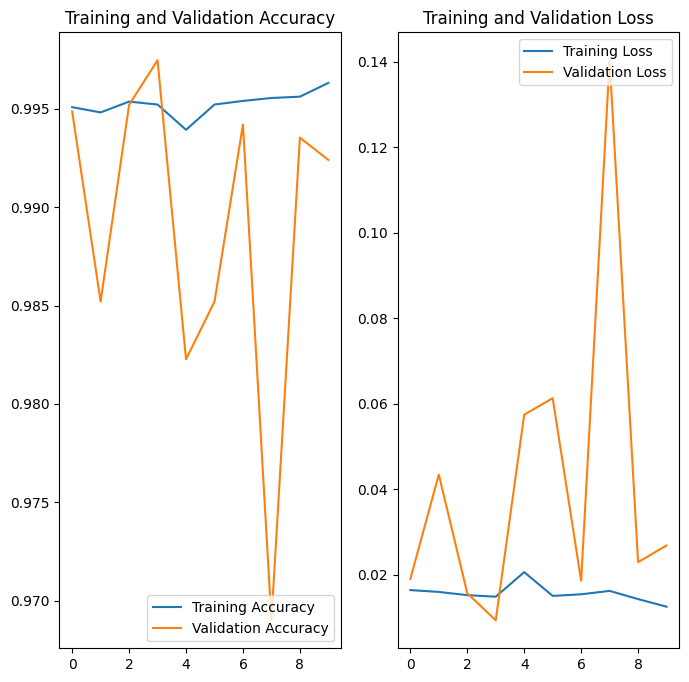

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
img_url = "https://www.punjabricemills.com/assets/img/Super-Kernel-Basmati.png"
img_path = tf.keras.utils.get_file('test_grain_skb', origin=img_url)

img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 312ms/step
This image most likely belongs to Jasmine with a 99.29 percent confidence.


In [ ]:
from tensorflow.keras.models import save_model, load_model

#save_model(model, "ricemodel_beras.keras")

In [ ]:
confusion_matrix = np.zeros((num_classes, num_classes))

for images, labels in val_ds:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    confusion_matrix += tf.math.confusion_matrix(labels, predicted_classes).numpy()

# Normalize confusion matrix if needed


In [ ]:
confusion_matrix

In [ ]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, fmt='g',
            xticklabels=class_names, yticklabels=class_names, cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()